<a href="https://colab.research.google.com/github/JessePMelo/aluraStorebr/blob/main/AluraStoreBr_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - AluraStore Brasil 🇧🇷
___

**Este notebook é o projeto do curso Oracle Next Education + Alura.**

## 🎯 Objetivo

Realizar uma análise de dados utilizando Python com foco em Business Intelligence (BI), aplicando técnicas aprendidas ao longo do curso para extrair informações relevantes dos dados de vendas das lojas da AluraStore.

## 📌 Desafio

Com base nos dados fornecidos, o desafio consiste em:

- Analisar o desempenho das quatro lojas da AluraStore;
- Gerar visualizações com gráficos e mapas interativos para facilitar a interpretação;
- Identificar as lojas com melhor e pior desempenho com base em:
  - Faturamento total;
  - Produtos mais e menos vendidos;
  - Categorias de produtos mais e menos populares;
  - Média de avaliações dos clientes;
  - Custo médio com frete;
- Apresentar, com base na análise, uma **recomendação justificada sobre qual loja o Senhor João deve vender**.

## 🧠 Metodologia

Neste notebook, os dados das quatro lojas foram unificados e analisados por meio de:

- Manipulação e tratamento com `pandas`;
- Visualização com `matplotlib` e `seaborn`;
- Mapas interativos com `folium`;
- Agrupamentos e estatísticas descritivas.

## 📈 Resultado Esperado

Ao final da análise, será apresentado um relatório claro e objetivo, com os principais insights obtidos e a **recomendação final sobre qual loja deve ser encerrada**, considerando seus pontos fortes e fracos em relação às demais.

---


Codigo base para a obtenção dos dados

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

#loja.head()

Faturamento por loja

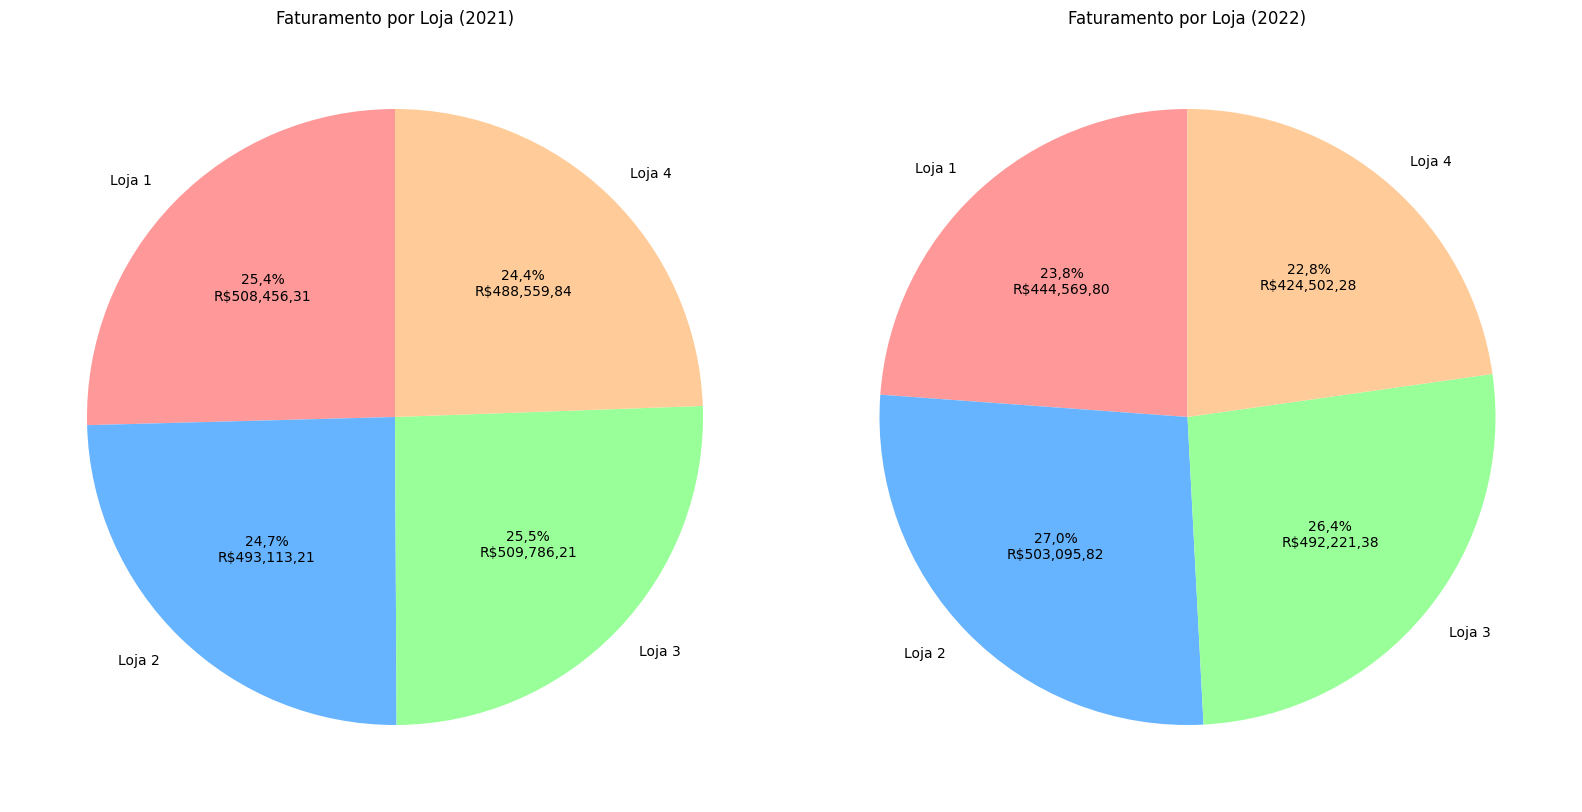

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Lista com as lojas e nomes
lojas = [loja1, loja2, loja3, loja4]
nomes_lojas = [f'Loja {i+1}' for i in range(len(lojas))]

# Dicionários para armazenar os faturamentos separados por ano
faturamento_ano_passado = {}
faturamento_ano_antepassado = {}

# Definir cores fixas para as lojas
cores_lojas = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Ano fixo
anos = [2021, 2022]

for i, loja in enumerate(lojas):
    loja['Data da Compra'] = pd.to_datetime(loja['Data da Compra'], dayfirst=True)
    loja['Total'] = loja['Preço'] + loja['Frete']
    loja['Ano'] = loja['Data da Compra'].dt.year

    # Filtrando os dados por ano
    dados_ano_passado = loja[loja['Ano'] == anos[1]]
    dados_ano_antepassado = loja[loja['Ano'] == anos[0]]

    faturamento_ano_passado[nomes_lojas[i]] = dados_ano_passado['Total'].sum()
    faturamento_ano_antepassado[nomes_lojas[i]] = dados_ano_antepassado['Total'].sum()

# Função personalizada para mostrar % e R$
def formatar_autopct(valores):
    def func(pct):
        total = sum(valores)
        valor = pct * total / 100
        return f'{pct:.1f}%\nR${valor:,.2f}'.replace('.', ',')
    return func

# Criar subplots lado a lado, invertendo a ordem dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico do ano de 2021 (passado)
axes[1].pie(
    faturamento_ano_passado.values(),
    labels=faturamento_ano_passado.keys(),
    autopct=formatar_autopct(list(faturamento_ano_passado.values())),
    startangle=90,
    colors=cores_lojas
)
axes[1].set_title(f'Faturamento por Loja ({anos[1]})')

# Gráfico do ano de 2022 (antepassado)
axes[0].pie(
    faturamento_ano_antepassado.values(),
    labels=faturamento_ano_antepassado.keys(),
    autopct=formatar_autopct(list(faturamento_ano_antepassado.values())),
    startangle=90,
    colors=cores_lojas
)
axes[0].set_title(f'Faturamento por Loja ({anos[0]})')

plt.tight_layout()
plt.savefig('faturamento_lojas_2021_2022.png', dpi=300, bbox_inches='tight')
plt.show()


Grafico dos itens mais vendidos

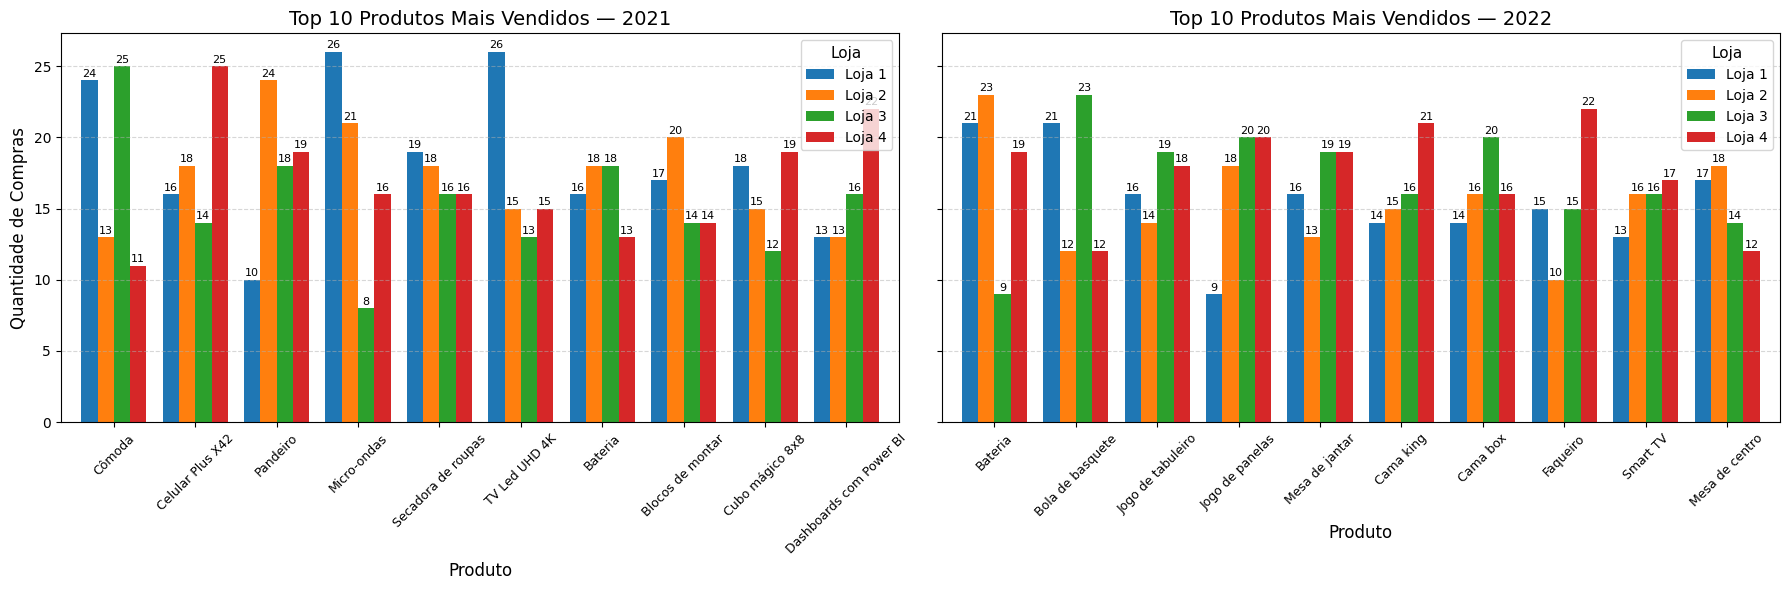

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Leitura e identificação de cada loja
lojas = []
for i, url in enumerate(urls, start=1):
    df = pd.read_csv(url)
    df['Loja'] = f'Loja {i}'
    df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)
    df['Ano'] = df['Data da Compra'].dt.year
    lojas.append(df)

# Concatena tudo
df = pd.concat(lojas, ignore_index=True)

# Parâmetros de plot
anos = [2021, 2022]
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # até 4 lojas
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

for ax, ano in zip(axes, anos):
    # filtra o ano
    df_ano = df[df['Ano'] == ano]
    # conta vendas por produto e loja
    prod_loja = (
        df_ano
        .groupby(['Produto', 'Loja'])
        .size()
        .reset_index(name='Quantidade')
    )
    # pivot para ter lojas como colunas
    tabela = prod_loja.pivot(index='Produto', columns='Loja', values='Quantidade').fillna(0).astype(int)

    # seleciona top 10 produtos mais vendidos (pela soma das lojas)
    soma_total = tabela.sum(axis=1).sort_values(ascending=False)
    top10 = soma_total.head(10).index
    tabela = tabela.loc[top10]

    # plota barras agrupadas
    tabela.plot(kind='bar', ax=ax, color=cores, width=0.8)
    ax.set_title(f'Top 10 Produtos Mais Vendidos — {ano}', fontsize=14)
    ax.set_xlabel('Produto', fontsize=12)
    ax.set_ylabel('Quantidade de Compras', fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.legend(title='Loja', fontsize=10, title_fontsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # rótulos de valor
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=8, label_type='edge', padding=1)

plt.tight_layout()
plt.savefig('top10_produtos_mais_vendidos_2021_2022.png', dpi=300, bbox_inches='tight')
plt.show()


Total de vendas segmentado por categoria

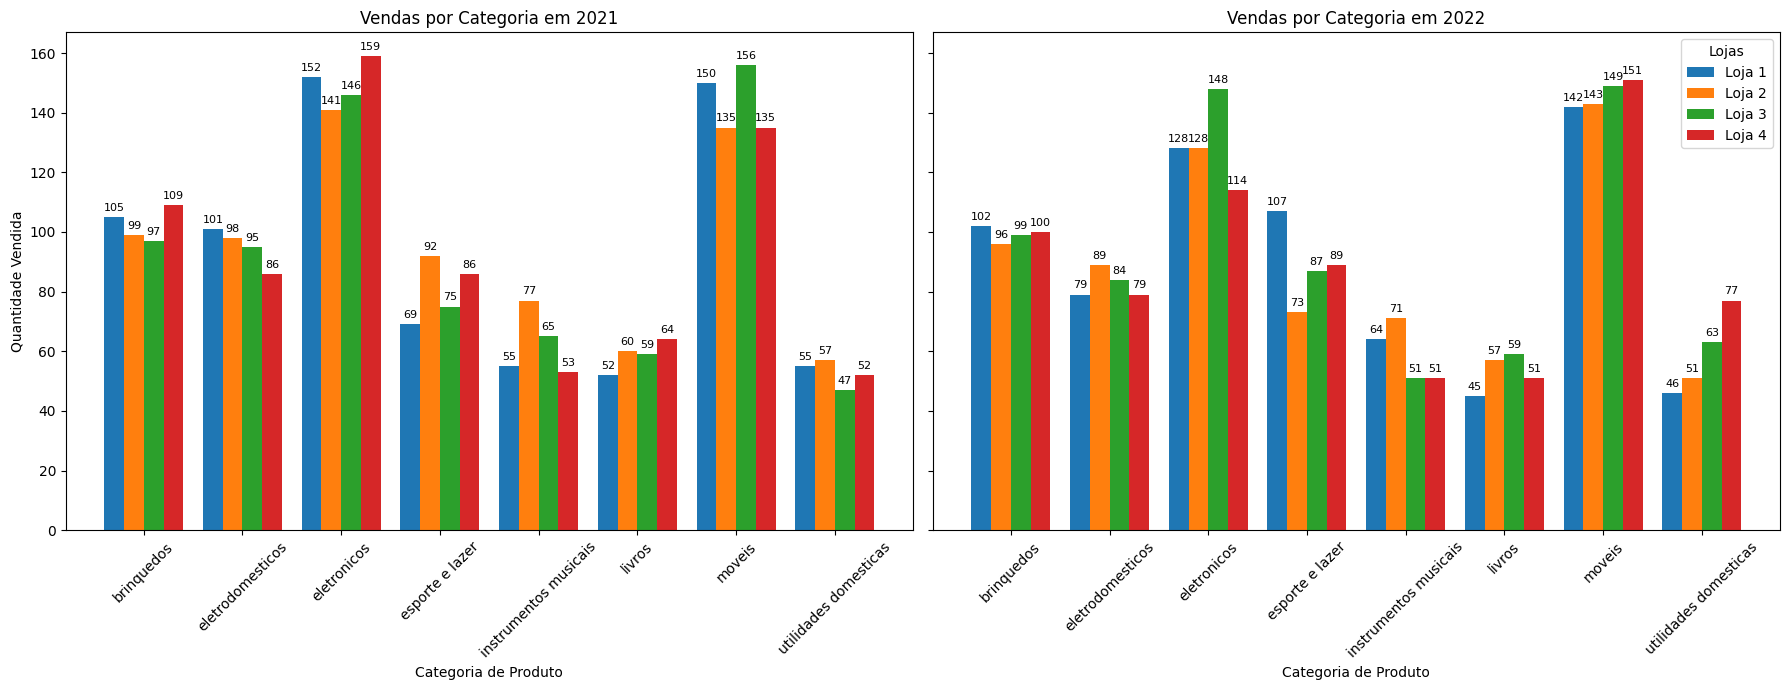

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Lista com os DataFrames das lojas e nomes
lojas = [loja1, loja2, loja3, loja4]
nomes_lojas = [f'Loja {i+1}' for i in range(len(lojas))]

# Definir cores fixas para as lojas
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Anos fixos
anos = [2021, 2022]

# Inicializar os subplots com 2022 à esquerda
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

for idx, ano in enumerate(anos):
    # Filtrar as lojas para o ano atual
    lojas_ano = []
    for loja in lojas:
        loja['Data da Compra'] = pd.to_datetime(loja['Data da Compra'], dayfirst=True)
        loja['Ano'] = loja['Data da Compra'].dt.year
        lojas_ano.append(loja[loja['Ano'] == ano])

    # Obter todas as categorias presentes no ano atual
    todas_categorias = sorted(set().union(*[set(loja['Categoria do Produto']) for loja in lojas_ano]))

    # Montar estrutura de dados
    vendas_por_loja = {nome_loja: [] for nome_loja in nomes_lojas}
    for loja_df, nome_loja in zip(lojas_ano, nomes_lojas):
        contagem = loja_df['Categoria do Produto'].value_counts()
        for categoria in todas_categorias:
            vendas_por_loja[nome_loja].append(contagem.get(categoria, 0))

    # Transformar em DataFrame
    df_vendas = pd.DataFrame(vendas_por_loja, index=todas_categorias)

    # Posições e largura das barras
    posicoes = np.arange(len(df_vendas.index))
    largura_barra = 0.2

    # Criar as barras
    for i, nome_loja in enumerate(df_vendas.columns):
        barras = axes[idx].bar(posicoes + i * largura_barra, df_vendas[nome_loja],
                               width=largura_barra, label=nome_loja, color=cores[i])

        # Adicionar os valores em cima das barras
        for barra in barras:
            altura = barra.get_height()
            axes[idx].annotate(f'{int(altura)}',
                               xy=(barra.get_x() + barra.get_width() / 2, altura),
                               xytext=(0, 3),
                               textcoords="offset points",
                               ha='center', va='bottom', fontsize=8)

    # Configurar eixo x e títulos
    axes[idx].set_title(f'Vendas por Categoria em {ano}')
    axes[idx].set_xlabel('Categoria de Produto')
    axes[idx].set_xticks(posicoes + largura_barra * (len(lojas) - 1) / 2)
    axes[idx].set_xticklabels(df_vendas.index, rotation=45)

# Y comum e legenda
axes[0].set_ylabel('Quantidade Vendida')
axes[1].legend(title='Lojas', loc='upper right')

# Ajustar layout
plt.tight_layout()
plt.savefig('vendas_por_categoria_2021_2022.png', dpi=300, bbox_inches='tight')
plt.show()


Vendas por categoria com percentual/total

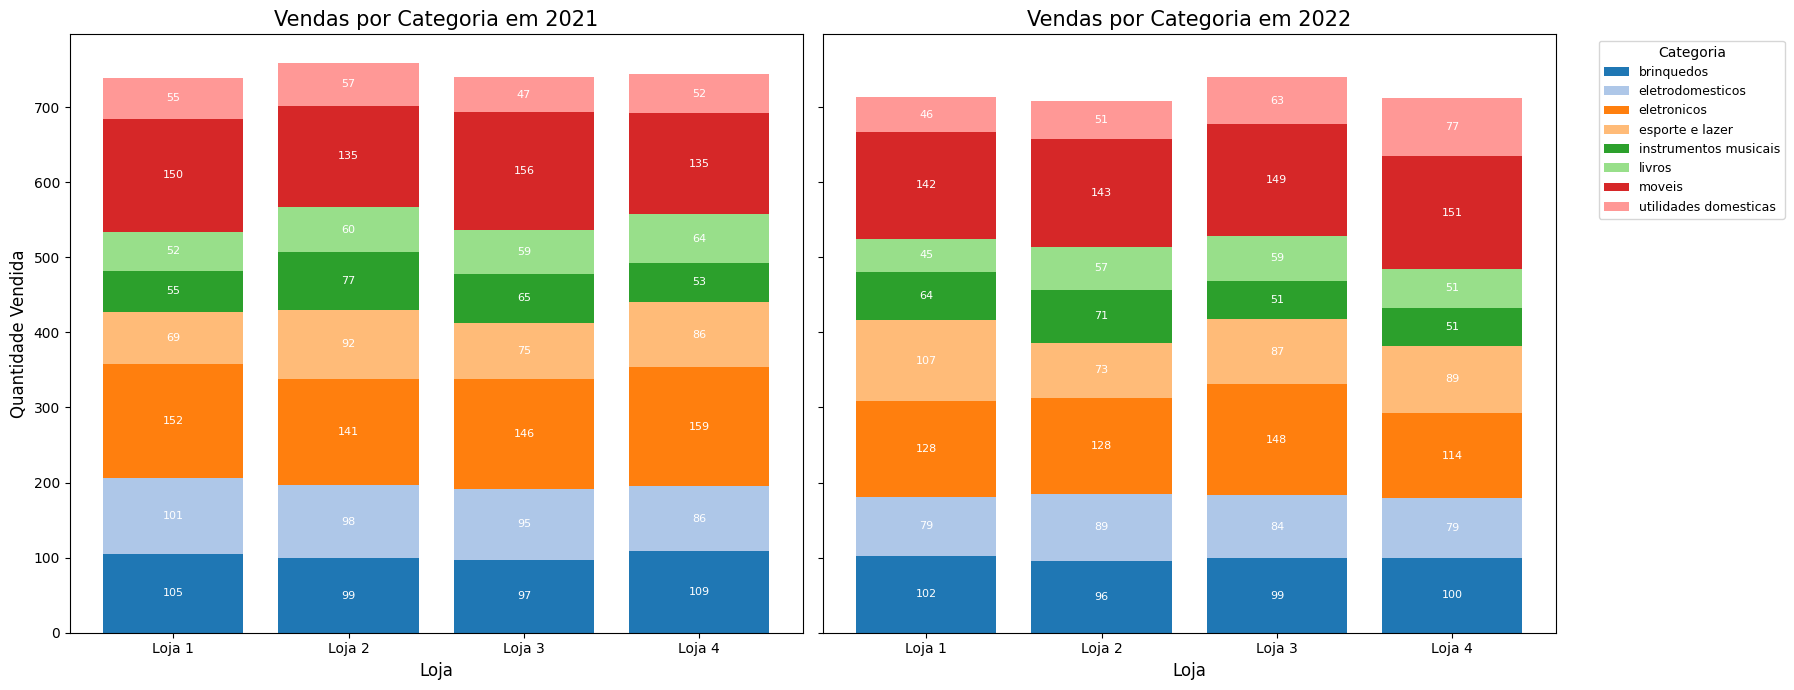

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lista com os DataFrames das lojas e nomes
lojas = [loja1, loja2, loja3, loja4]
nomes_lojas = [f'Loja {i+1}' for i in range(len(lojas))]

# Converter datas e adicionar coluna de ano
for loja in lojas:
    loja['Data da Compra'] = pd.to_datetime(loja['Data da Compra'], dayfirst=True)
    loja['Ano'] = loja['Data da Compra'].dt.year

# Concatenar todos os DataFrames com índice da loja
df_total = pd.concat(lojas, keys=nomes_lojas, names=['Loja'])

# Definir anos a serem analisados
anos = [2021, 2022]

# Definir cores
cores = plt.cm.tab20.colors

# Criar os subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

for idx, ano in enumerate(anos):
    # Filtrar dados do ano
    df_ano = df_total[df_total['Ano'] == ano]

    # Agrupar por loja e categoria
    agrupado = df_ano.groupby(['Loja', 'Categoria do Produto']).size().unstack(fill_value=0)

    # Garantir ordem e presença de todas categorias
    categorias = sorted(df_ano['Categoria do Produto'].unique())
    agrupado = agrupado.reindex(columns=categorias, fill_value=0)

    # Plotar gráfico de barras empilhadas
    ax = axes[idx]
    posicoes = np.arange(len(agrupado.index))
    base = np.zeros(len(agrupado.index))

    for i, categoria in enumerate(agrupado.columns):
        valores = agrupado[categoria].values
        barras = ax.bar(posicoes, valores, bottom=base, label=categoria, color=cores[i % len(cores)])

        # Adicionar rótulos nas barras
        for j, barra in enumerate(barras):
            altura = barra.get_height()
            if altura > 0:
                ax.annotate(f'{int(altura)}',
                            xy=(barra.get_x() + barra.get_width() / 2, base[j] + altura / 2),
                            ha='center', va='center', fontsize=8, color='white')

        base += valores

    # Configurações do gráfico
    ax.set_title(f'Vendas por Categoria em {ano}', fontsize=15)
    ax.set_xlabel('Loja', fontsize=12)
    ax.set_xticks(posicoes)
    ax.set_xticklabels(agrupado.index)
    if idx == 0:
        ax.set_ylabel('Quantidade Vendida', fontsize=12)

# Legenda fora do gráfico
axes[1].legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, title_fontsize=10)

# Ajustar layout e salvar imagem
plt.tight_layout()
plt.savefig('vendas_por_categoria_agrupada_proporcional_2021_2022.png', dpi=300, bbox_inches='tight')
plt.show()


Media da avaliação total das lojas

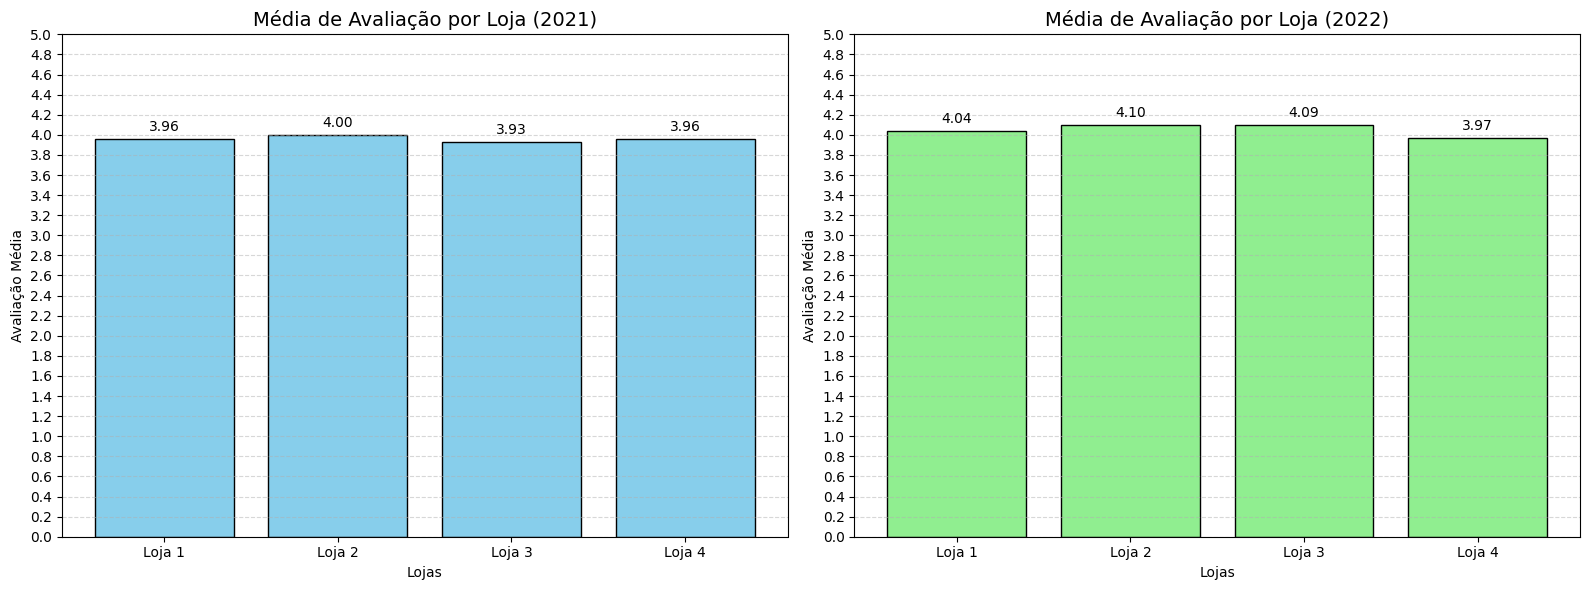

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Recarregar dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

dfs = []
for url in urls:
    df = pd.read_csv(url)
    df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)
    df['Ano'] = df['Data da Compra'].dt.year
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

# Definir os anos a comparar
anos = [2021, 2022]

# Calcular média por categoria para cada ano
medias_por_ano = {}
for ano in anos:
    df_ano = df[df['Ano'] == ano]
    medias_por_ano[ano] = df_ano.groupby('Categoria do Produto')['Avaliação da compra'].mean()

# Obter todas as categorias envolvidas
todas_categorias = sorted(set().union(*[media.index for media in medias_por_ano.values()]))

# Reindexar os dados com todas as categorias
for ano in anos:
    medias_por_ano[ano] = medias_por_ano[ano].reindex(todas_categorias)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for idx, ano in enumerate(anos):
    ax = axes[idx]
    ax.bar(todas_categorias, medias_por_ano[ano], color='skyblue' if ano == 2022 else 'lightgreen')
    ax.set_title(f'Avaliação Média por Categoria em {ano}', fontsize=14)
    ax.set_xlabel('Categoria', fontsize=12)
    if idx == 0:
        ax.set_ylabel('Avaliação Média', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('media_por_categoria_2021_2022.png', dpi=300, bbox_inches='tight')
plt.show()


Media do vendedor por loja

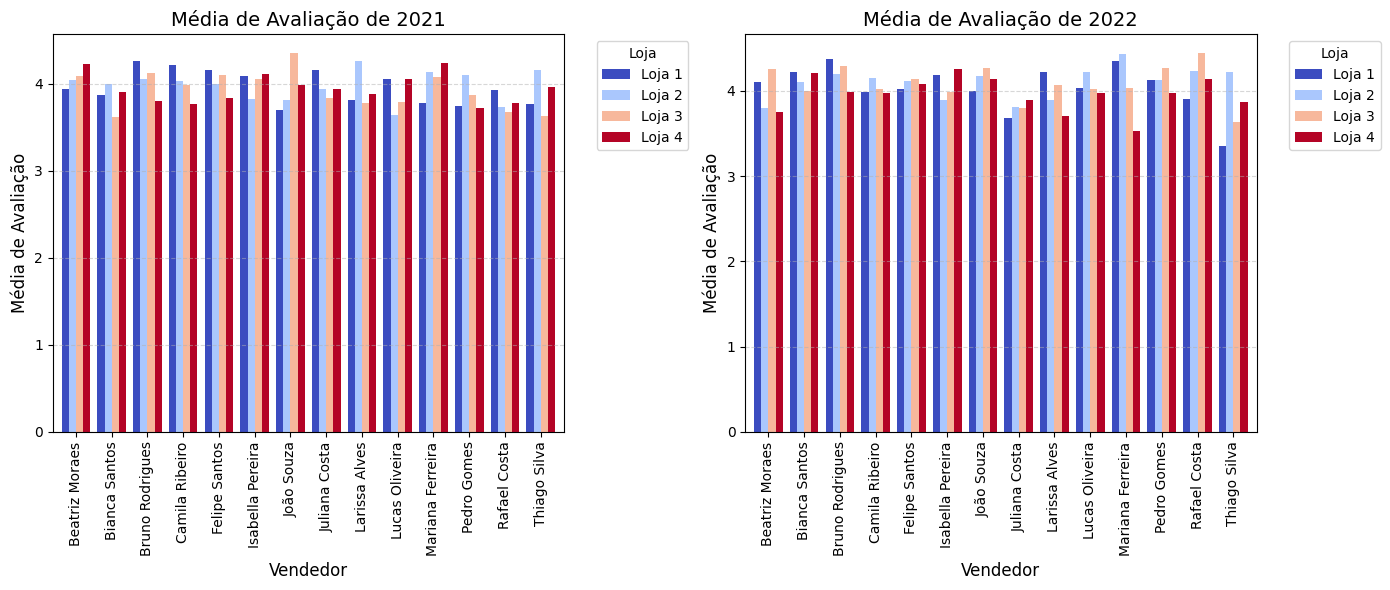

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista com os DataFrames das lojas e nomes
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Recarregar os dados e adicionar as colunas de data e ano
lojas = []
for url in urls:
    df = pd.read_csv(url)
    df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)
    df['Ano'] = df['Data da Compra'].dt.year
    lojas.append(df)

# Concatenar todos os DataFrames com índice da loja
nomes_lojas = [f'Loja {i+1}' for i in range(len(lojas))]
df_total = pd.concat(lojas, keys=nomes_lojas, names=['Loja'])

# Lista dos anos a analisar
anos = [2021, 2022]

# Lista para armazenar os DataFrames agrupados de cada loja
df_avaliacoes = []

# Agrupamento por loja, vendedor e ano
for i, loja in enumerate(lojas, start=1):
    loja['Data da Compra'] = pd.to_datetime(loja['Data da Compra'], dayfirst=True)
    loja['Ano'] = loja['Data da Compra'].dt.year
    loja['Loja'] = f'Loja {i}'

    agrupado = loja.groupby(['Loja', 'Vendedor', 'Ano'])['Avaliação da compra'].mean().reset_index()
    df_avaliacoes.append(agrupado)

# Unir todos os dados em um único DataFrame
df_media_avaliacao = pd.concat(df_avaliacoes, ignore_index=True)

# Criar figura com subplots
fig, axes = plt.subplots(1, len(anos), figsize=(14, 6))

# Plotar gráficos dinamicamente para cada ano
for idx, ano in enumerate(anos):
    ax = axes[idx]
    df_ano = df_media_avaliacao[df_media_avaliacao['Ano'] == ano]
    df_pivot = df_ano.pivot_table(index='Vendedor', columns='Loja', values='Avaliação da compra')

    df_pivot.plot(kind='bar', ax=ax, width=0.8, colormap='coolwarm')

    ax.set_title(f'Média de Avaliação de {ano}', fontsize=14)
    ax.set_xlabel('Vendedor', fontsize=12)
    ax.set_ylabel('Média de Avaliação', fontsize=12)
    ax.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar layout
plt.tight_layout()

# Salvar como imagem
plt.savefig('media_de_avaliacao_vendedor_2021_2022.png', dpi=300, bbox_inches='tight')
plt.show()


Mapa com quantidade de vendas, avaliação e locais de compras

In [4]:
import pandas as pd
import folium
import branca.colormap as cm
import numpy as np

# Carregar os dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Unir os dados
lojas = pd.concat([loja1, loja2, loja3, loja4])

# Garantir que a data esteja no formato datetime e criar coluna de ano
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'], dayfirst=True)
lojas['Ano'] = lojas['Data da Compra'].dt.year

# Lista dos anos a analisar
anos = [2021, 2022]

# Função para gerar o mapa por ano
def gerar_mapa_por_ano(lojas, ano):
    # Filtrar por ano
    lojas_ano = lojas[lojas['Ano'] == ano]

    # Agrupar por local
    grupo = lojas_ano.groupby(['Local da compra', 'lat', 'lon']).agg({
        'Produto': 'count',
        'Avaliação da compra': 'mean',
        'Frete': ['sum', 'mean']
    }).reset_index()

    grupo.columns = ['Local', 'lat', 'lon', 'Vendas', 'Avaliação média', 'Frete total', 'Frete médio']

    # Criar mapa
    mapa = folium.Map(location=[-14.235, -51.925], zoom_start=4, tiles="CartoDB positron")

    # Escala de cor: azul (alta avaliação) → vermelho (baixa)
    colormap = cm.LinearColormap(
        colors=['red', 'orange', 'yellow', 'lightblue', 'blue'],
        vmin=grupo['Avaliação média'].min(),
        vmax=grupo['Avaliação média'].max(),
        caption='Avaliação Média da Compra'
    )
    mapa.add_child(colormap)

    # Círculos
    for _, row in grupo.iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=np.sqrt(row['Vendas']) * 0.8,
            color=colormap(row['Avaliação média']),
            fill=True,
            fill_opacity=0.7,
            popup=folium.Popup(f"""
                <b>Local:</b> {row['Local']}<br>
                <b>Vendas:</b> {int(row['Vendas'])}<br>
                <b>Avaliação média:</b> {row['Avaliação média']:.2f}<br>
                <b>Frete total:</b> R${row['Frete total']:.2f}<br>
                <b>Frete médio:</b> R${row['Frete médio']:.2f}
            """, max_width=300)
        ).add_to(mapa)

    # Legenda explicativa
    legenda_html = f"""
    <div style="position: fixed;
        bottom: 50px; left: 50px; width: 200px; height: auto;
        background-color: white; z-index:9999; font-size:12px;
        border:1px solid grey; border-radius:8px; padding: 8px; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
        <b>Legenda ({ano}):</b><br>
        <span style='color:blue'>Azul</span> = Avaliação alta<br>
        <span style='color:red'>Vermelho</span> = Avaliação baixa<br>
        Tamanho do círculo = Vendas<br>
        Cor do círculo = Avaliação média
    </div>
    """
    mapa.get_root().html.add_child(folium.Element(legenda_html))

    return mapa

# Gerar mapas para 2022 e 2023
mapa_2021 = gerar_mapa_por_ano(lojas, 2021)
mapa_2022 = gerar_mapa_por_ano(lojas, 2022)

mapa_2021.save('mapa_avaliacoes_2021.html')
mapa_2022.save('mapa_avaliacoes_2022.html')

mapa_2021


Media de parcelas quando item comprado parcelado

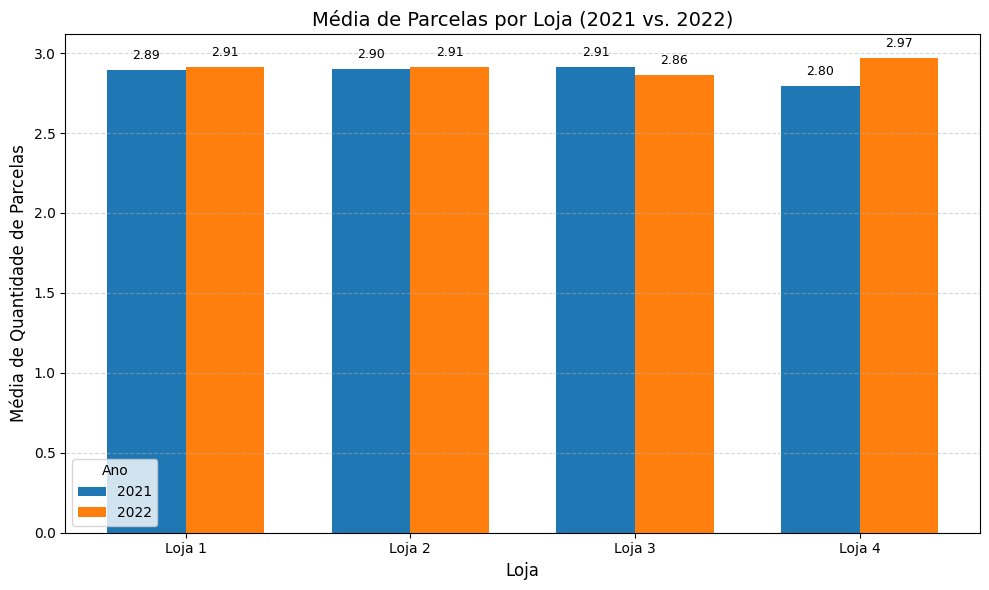

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definir anos de interesse aqui
anos = [2021, 2022]

# Carregar os dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionar a coluna 'Loja'
loja1["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

# Unir os dados
lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Converter datas e extrair o ano
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'], dayfirst=True)
lojas['Ano'] = lojas['Data da Compra'].dt.year

# Filtrar apenas os anos definidos
df_filtered = lojas[lojas['Ano'].isin(anos)]

# Calcular média de parcelas por loja e ano
mean_parcelas = (
    df_filtered
    .groupby(['Loja', 'Ano'])['Quantidade de parcelas']
    .mean()
    .unstack()
    .loc[:, anos]
)

# Plot agrupado
lojas_nomes = mean_parcelas.index.tolist()
x = np.arange(len(lojas_nomes))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
for idx, ano in enumerate(anos):
    ax.bar(x + idx*width, mean_parcelas[ano], width, label=str(ano))

ax.set_title(f'Média de Parcelas por Loja ({anos[0]} vs. {anos[1]})', fontsize=14)
ax.set_xlabel('Loja', fontsize=12)
ax.set_ylabel('Média de Quantidade de Parcelas', fontsize=12)
ax.set_xticks(x + width*(len(anos)-1)/2)
ax.set_xticklabels(lojas_nomes, rotation=0, fontsize=10)
ax.legend(title='Ano', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionar valores nas barras
for idx, ano in enumerate(anos):
    for xi, val in zip(x + idx*width, mean_parcelas[ano]):
        ax.text(xi, val + 0.05, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig(f"media_parcela_lojas_{anos[0]}_{anos[1]}.png", dpi=300, bbox_inches="tight")
plt.show()


Indicadores de metodos de pagamento

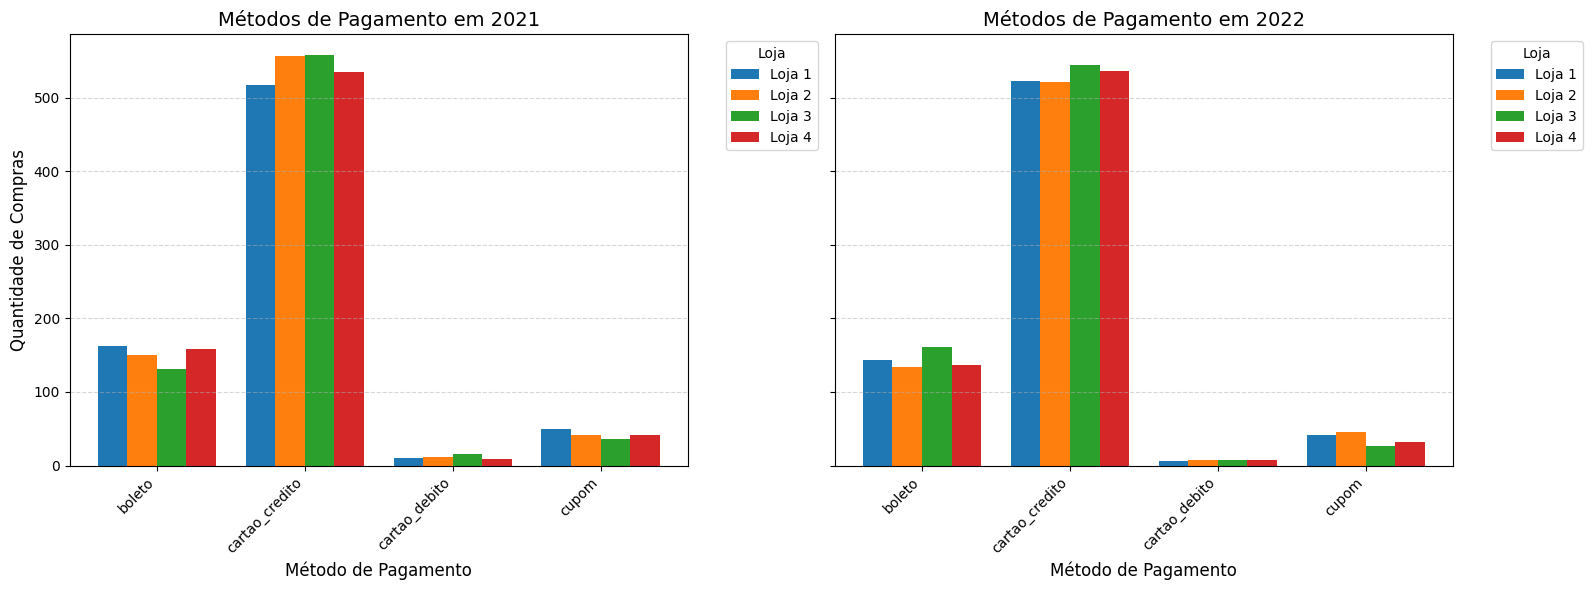

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionar a coluna 'Loja' antes da união
loja1["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

# Unir os dados
lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Converter data e extrair o ano
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'], dayfirst=True)
lojas['Ano'] = lojas['Data da Compra'].dt.year

# Filtrar apenas os anos de interesse
anos = [2021, 2022]
df_all = lojas[lojas['Ano'].isin(anos)]

# Cores para as lojas
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for ax, ano in zip(axes, anos):
    df_ano = df_all[df_all['Ano'] == ano]

    # Contar compras por tipo de pagamento e loja
    grp = (
        df_ano.groupby(['Tipo de pagamento', 'Loja'])
        .size()
        .reset_index(name='Contagem')
    )

    # Pivot para colocar as lojas como colunas
    tabela = grp.pivot(index='Tipo de pagamento', columns='Loja', values='Contagem')\
               .fillna(0).astype(int)

    # Plot de barras agrupadas
    x = np.arange(len(tabela))
    width = 0.2
    for i, loja in enumerate(tabela.columns):
        ax.bar(x + i * width, tabela[loja], width, label=loja, color=cores[i])

    ax.set_title(f'Métodos de Pagamento em {ano}', fontsize=14)
    ax.set_xlabel('Método de Pagamento', fontsize=12)
    if ano == 2021:
        ax.set_ylabel('Quantidade de Compras', fontsize=12)
    ax.set_xticks(x + width * (len(tabela.columns) - 1) / 2)
    ax.set_xticklabels(tabela.index, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("metodos_pagamento_lojas_2021_2022.png", dpi=300, bbox_inches="tight")
plt.show()


Media de parcelas por categoria

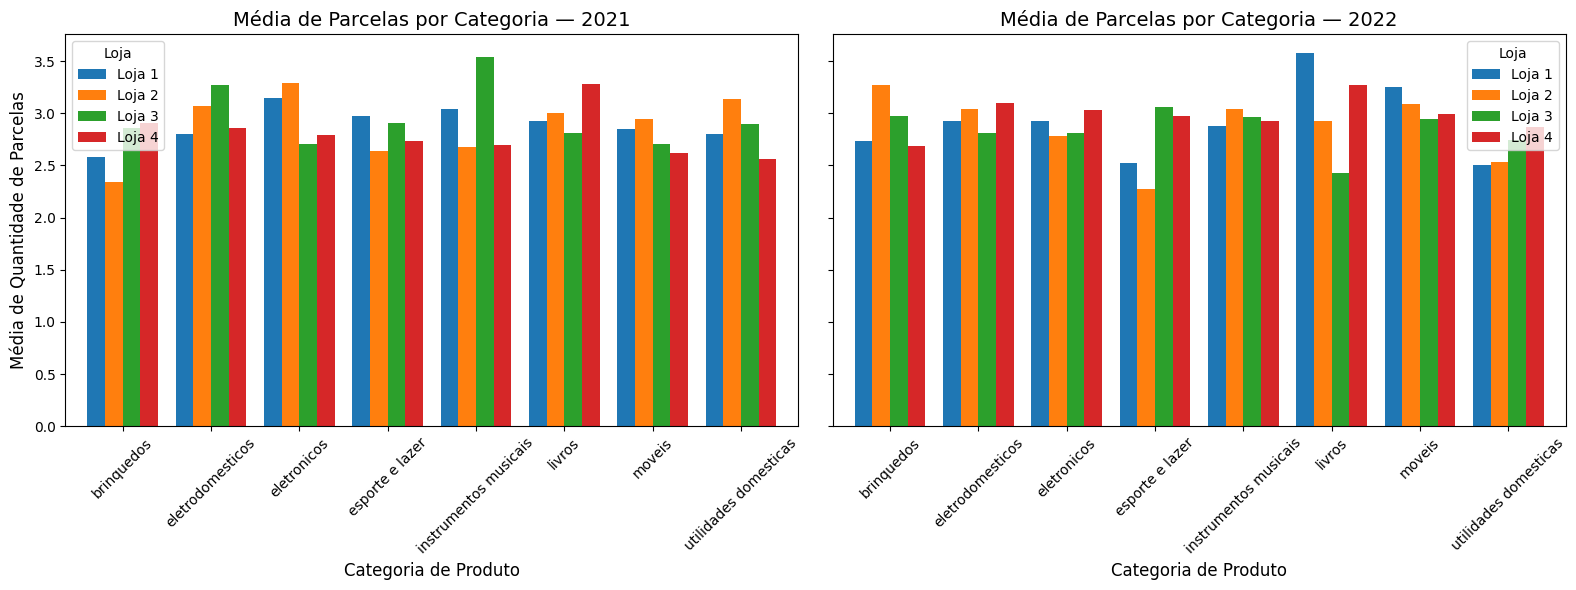

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionar a coluna 'Loja' antes da união
loja1["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

# Defina os anos desejados aqui
anos = [2021, 2022]

# Lista de DataFrames
lojas = [loja1, loja2, loja3, loja4]

# Preparar dados: adicionar colunas Ano e Loja
for idx, loja in enumerate(lojas, start=1):
    loja['Data da Compra'] = pd.to_datetime(loja['Data da Compra'], dayfirst=True)
    loja['Ano'] = loja['Data da Compra'].dt.year
    loja['Loja'] = f'Loja {idx}'

# Concatenar
df_all = pd.concat(lojas, ignore_index=True)

# Filtrar pelos anos definidos
df_filtered = df_all[df_all['Ano'].isin(anos)]

# Função para pivotar
def pivot_parcelas(df):
    return (
        df.groupby(['Categoria do Produto', 'Loja'])['Quantidade de parcelas']
          .mean()
          .unstack(fill_value=0)
    )

# Criar a pivot para cada ano
pivot_anos = {ano: pivot_parcelas(df_filtered[df_filtered['Ano'] == ano]) for ano in anos}

# Plot
fig, axes = plt.subplots(1, len(anos), figsize=(16, 6), sharey=True)

for ax, ano in zip(axes, anos):
    pivot_anos[ano].plot(kind='bar', ax=ax, width=0.8)
    ax.set_title(f'Média de Parcelas por Categoria — {ano}', fontsize=14)
    ax.set_xlabel('Categoria de Produto', fontsize=12)
    ax.set_ylabel('Média de Quantidade de Parcelas', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(f"media_parcela_categorias_lojas_{anos[0]}_{anos[-1]}.png", dpi=300, bbox_inches="tight")
plt.show()


Comparativo de sazionalidade entre as lojas, metricas de vendas por categoria.

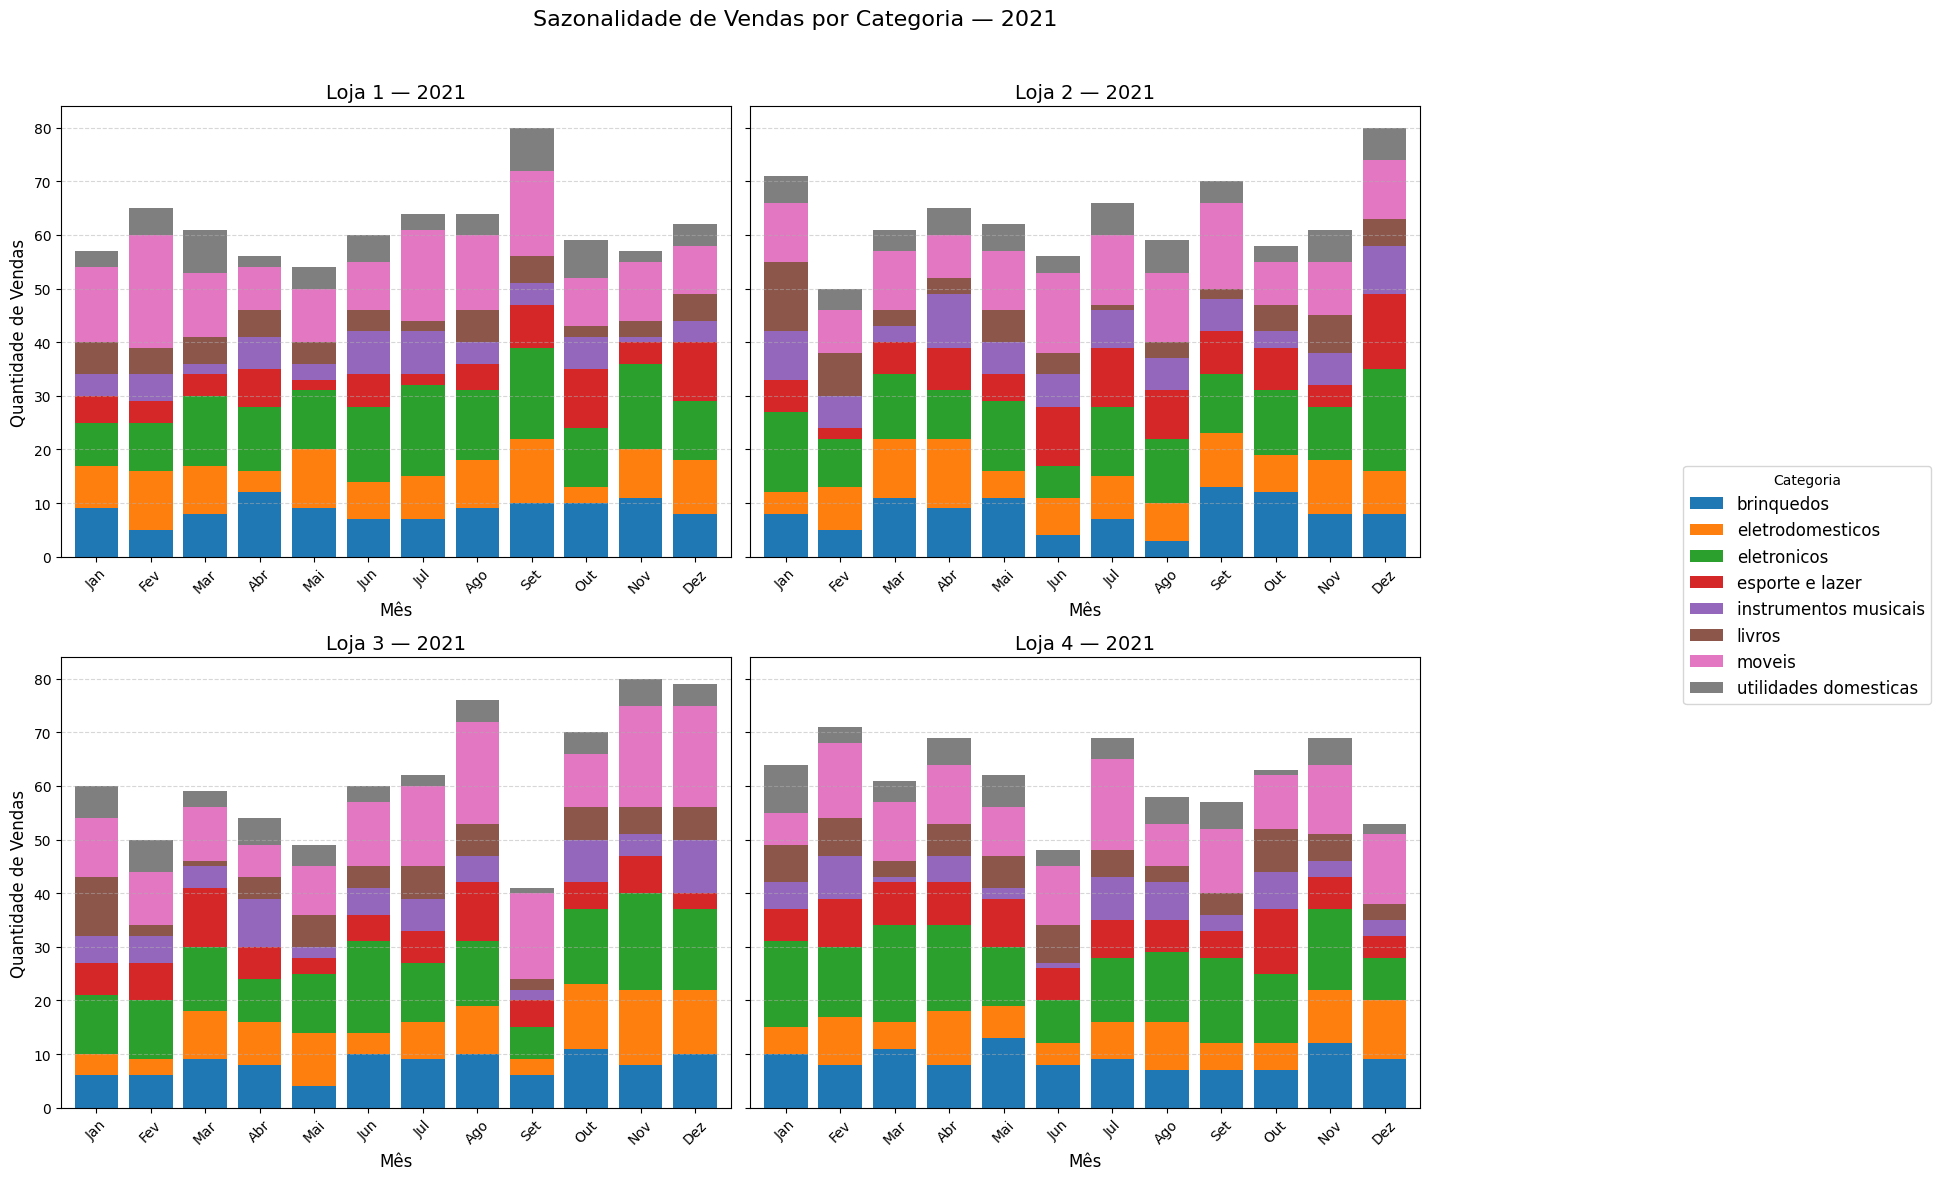

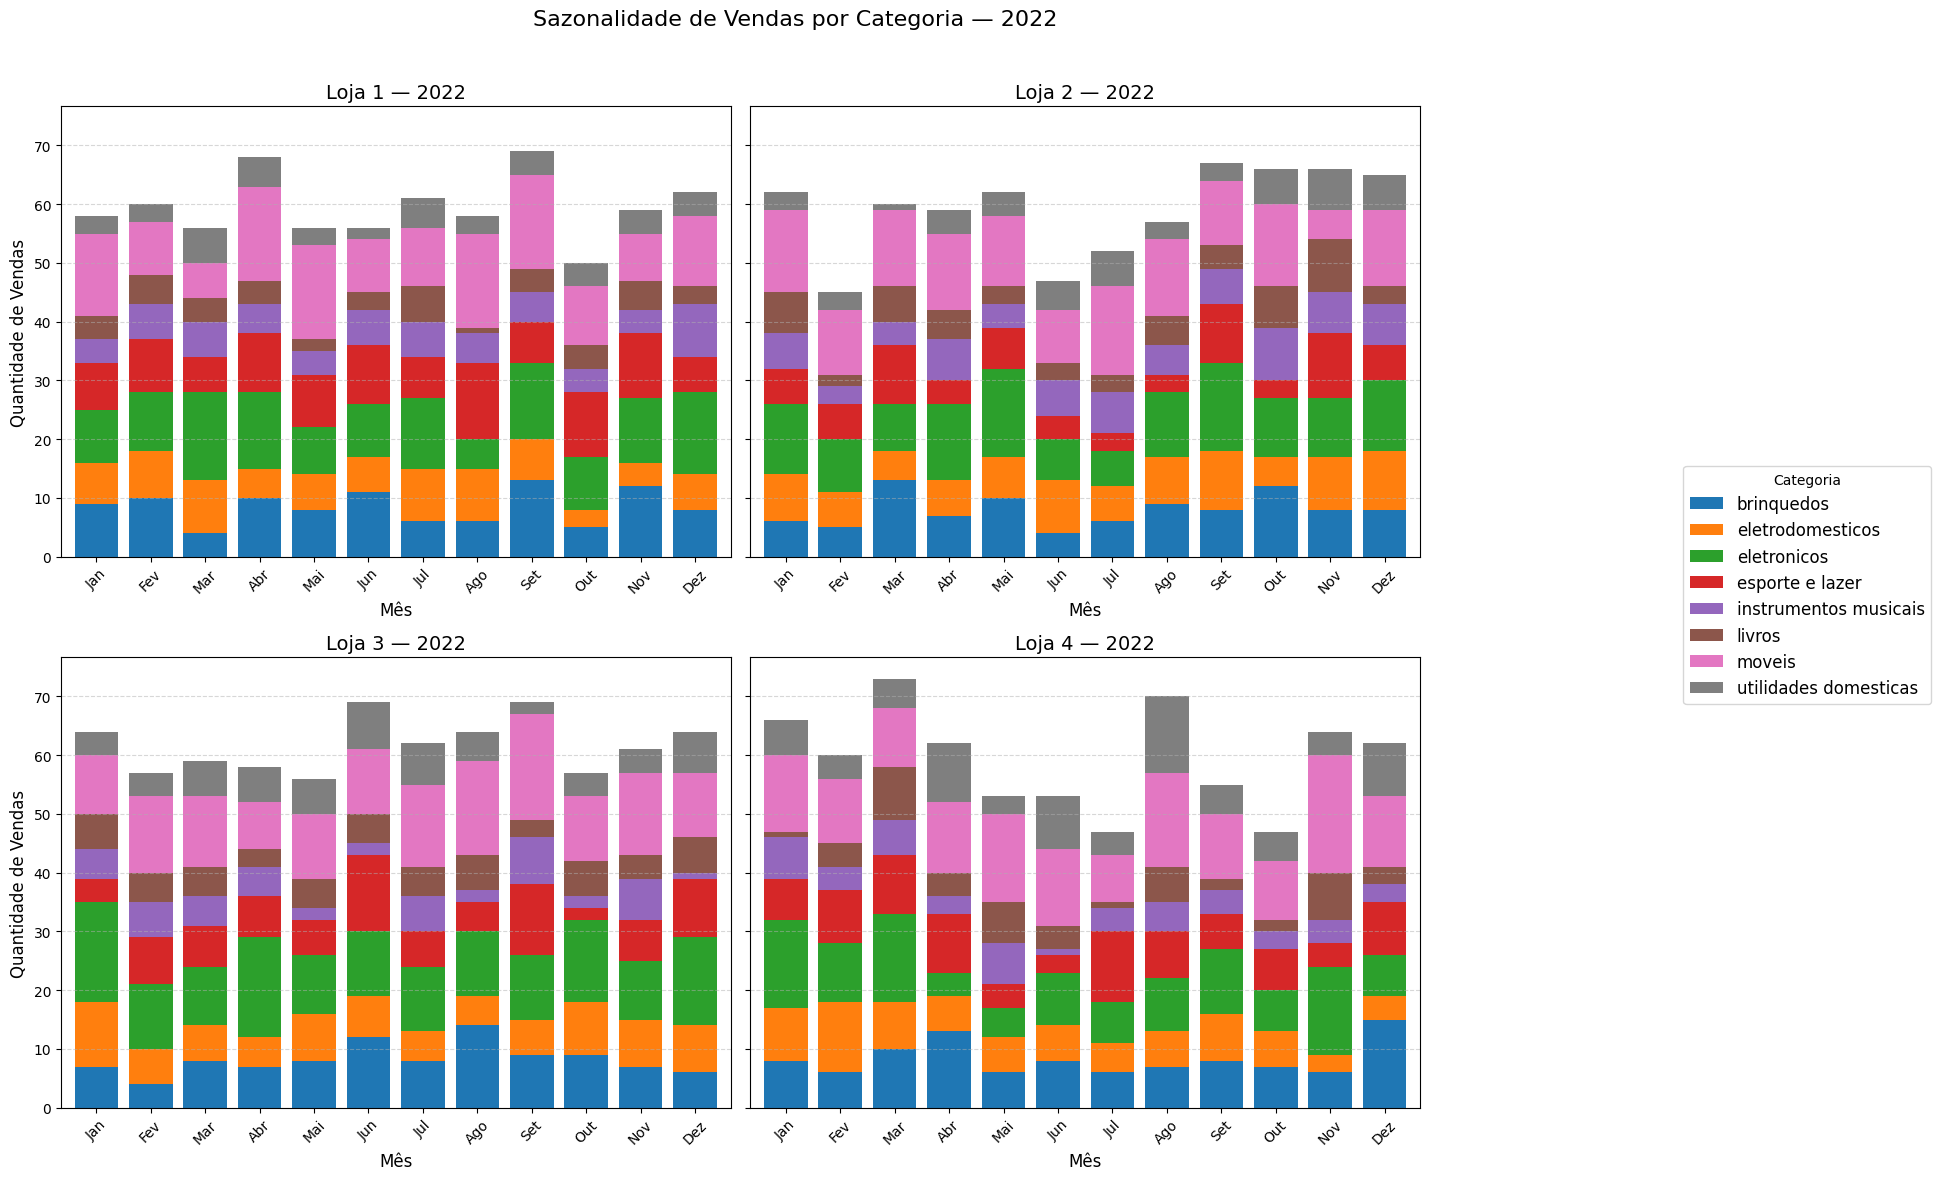

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionar a coluna 'Loja' antes da união
loja1["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

# Mapeamento numérico dos meses para nomes
meses = {
    1:'Jan', 2:'Fev', 3:'Mar', 4:'Abr', 5:'Mai', 6:'Jun',
    7:'Jul', 8:'Ago', 9:'Set', 10:'Out', 11:'Nov', 12:'Dez'
}

# Preparar lista de DataFrames com loja e mês
bases = []
for idx, loja in enumerate([loja1, loja2, loja3, loja4], start=1):
    df = loja.copy()
    df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)
    df['Ano'] = df['Data da Compra'].dt.year
    df['Mês'] = df['Data da Compra'].dt.month
    df['Loja'] = f'Loja {idx}'
    bases.append(df)

# Unificar todos os dados
df_all = pd.concat(bases, ignore_index=True)

# Função para plotar as 4 lojas de um ano
def plot_por_ano(anos):
    for ano in anos:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)
        axes = axes.flatten()

        for i, loja_nome in enumerate(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']):
            ax = axes[i]
            df_loja = df_all[(df_all['Loja'] == loja_nome) & (df_all['Ano'] == ano)]

            # Agrupar por mês e categoria
            grp = df_loja.groupby(['Mês', 'Categoria do Produto']).size().reset_index(name='Vendas')

            # Pivotar a tabela
            tabela = grp.pivot(index='Mês', columns='Categoria do Produto', values='Vendas')\
                       .fillna(0).astype(int)
            tabela.index = tabela.index.map(meses)

            # Gráfico de barras empilhadas sem a legenda interna
            tabela.plot(kind='bar', stacked=True, ax=ax, width=0.8, legend=False)
            ax.set_title(f'{loja_nome} — {ano}', fontsize=14)
            ax.set_xlabel('Mês', fontsize=12)
            if i % 2 == 0:
                ax.set_ylabel('Quantidade de Vendas', fontsize=12)
            ax.tick_params(axis='x', rotation=45)
            ax.grid(axis='y', linestyle='--', alpha=0.5)

        # Adicionar uma legenda global fora do gráfico
        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, labels, title='Categoria', bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=12)

        # Ajustar o layout para evitar sobreposição
        plt.suptitle(f'Sazonalidade de Vendas por Categoria — {ano}', fontsize=16)
        plt.tight_layout(rect=[0, 0, 0.9, 0.96])  # Ajustar o layout para dar espaço para a legenda
        plt.savefig(f"Sazonalidade de Vendas por Categoria — {ano}.png", dpi=300, bbox_inches="tight")
        plt.show()

# Digite os anos desejados
anos = [2021, 2022]

# Gerar os gráficos para os anos selecionados
plot_por_ano(anos)


Compras das lojas segmentado por estado.

<ipython-input-54-3846696640d0>:25: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_all['Ano'] = pd.to_datetime(df_all['Data da Compra']).dt.year


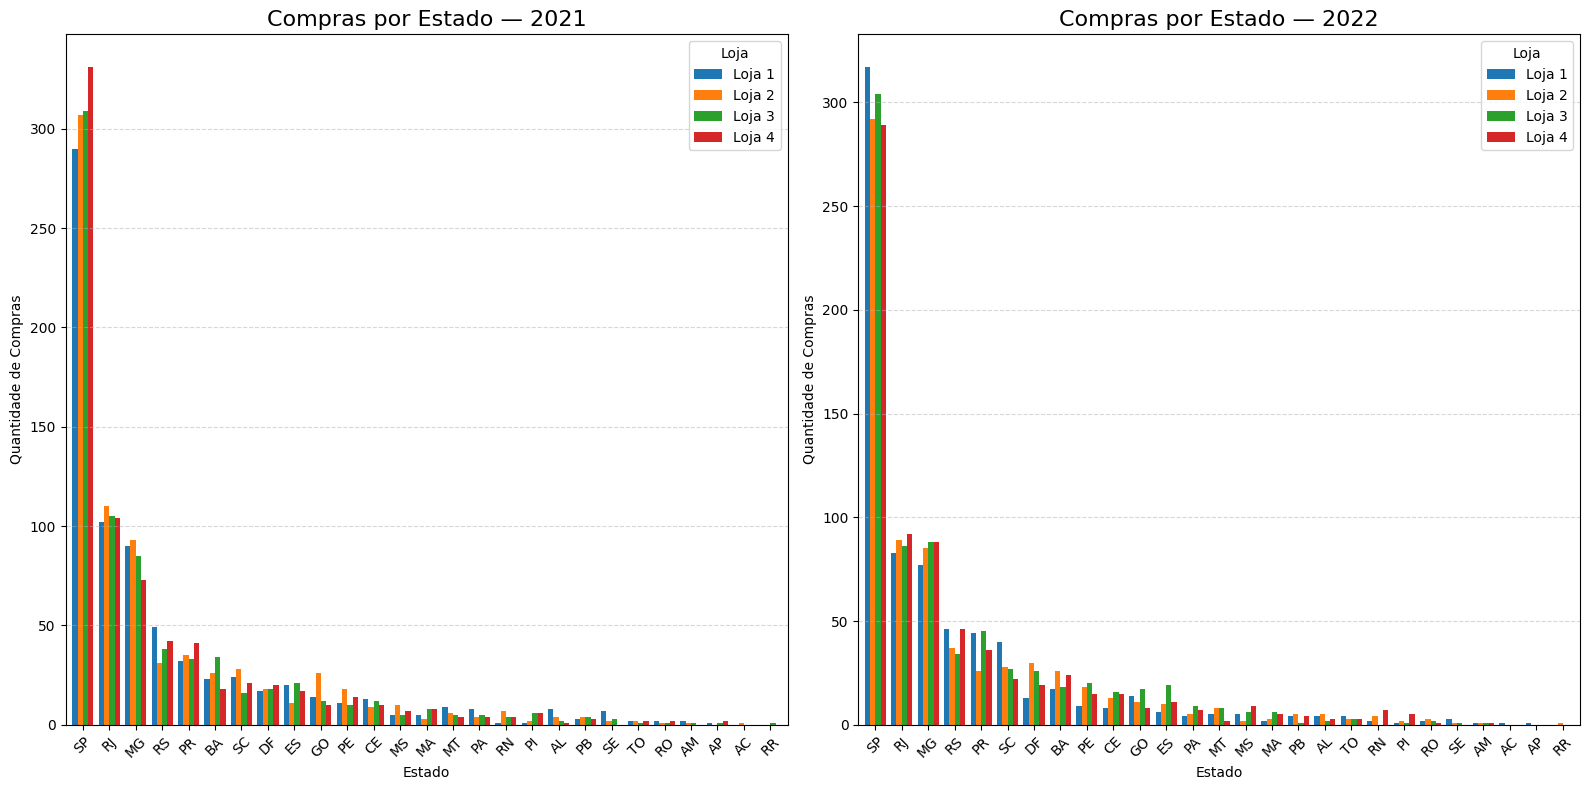

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionar a coluna 'Loja' antes da união
loja1["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

# Concatenar todas as lojas
df_all = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Consolidar dados por ano
df_all['Ano'] = pd.to_datetime(df_all['Data da Compra']).dt.year

# Função para plotar gráficos por ano com subplots
def plot_estados_comparados(anos):
    n = len(anos)  # Número de gráficos
    fig, axes = plt.subplots(1, n, figsize=(16, 8))  # 1 linha e n colunas
    if n == 1:
        axes = [axes]  # Garantir que axes seja uma lista, mesmo com um gráfico

    for i, ano in enumerate(anos):
        # Filtrar ano
        df_ano = df_all[df_all['Ano'] == ano]

        # Agrupar por loja e estado
        grupado = df_ano.groupby(['Local da compra', 'Loja']).size().reset_index(name='Quantidade')

        # Pivotar para deixar estados como índice e lojas como colunas
        pivot = grupado.pivot(index='Local da compra', columns='Loja', values='Quantidade').fillna(0).astype(int)

        # Ordenar por total geral (somando todas as lojas)
        pivot['Total'] = pivot.sum(axis=1)
        pivot = pivot.sort_values(by='Total', ascending=False).drop(columns='Total')

        # Plotar no subgráfico correspondente
        ax = axes[i]
        pivot.plot(kind='bar', ax=ax, width=0.8)
        ax.set_title(f'Compras por Estado — {ano}', fontsize=16)
        ax.set_xlabel('Estado')
        ax.set_ylabel('Quantidade de Compras')
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title='Loja')
        ax.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()

    # Salvar o gráfico com o nome no formato solicitado
    anos_str = "_".join(map(str, anos))
    plt.savefig(f"Compras_por_estado_{anos_str}.png", dpi=300, bbox_inches="tight")
    plt.show()

# Digite os anos desejados
anos = [2021, 2022]

# Gerar gráficos para os anos selecionados
plot_estados_comparados(anos)

# 📊 Relatório Final – AluraStore BR  
___  
<b>Este relatório apresenta os principais resultados obtidos na análise de dados realizada com Python, no contexto do desafio da Oracle Next Education + Alura.</b>  

<i>🎯 Objetivo:</i> Avaliar o desempenho das quatro lojas da AluraStore BR com base em indicadores estratégicos como faturamento, avaliações dos clientes, categorias de produtos, frete e métodos de pagamento.  

<i>📌 Objetivo final:</i> Indicar, de forma justificada, qual loja deve ser descontinuada, considerando os dados e gráficos gerados durante a análise.

___

## 💰 1. Desempenho Financeiro  

A análise do faturamento absoluto e da participação de mercado entre as lojas revela importantes insights:  
- **Loja 2:** Demonstrou crescimento consistente em faturamento e participação de mercado de 2021 para 2022, consolidando-se como líder. Isso sugere boa gestão e capacidade de adaptação às mudanças no comportamento do consumidor.  
- **Loja 1:** Apresentou queda no faturamento absoluto, mas manteve uma leve redução na participação. Com ajustes estratégicos, como foco em categorias promissoras (ex: esporte e lazer), ainda possui margem de recuperação.  
- **Loja 3:** Mostrou estabilidade nos resultados financeiros, indicando resiliência e potencial para manter performance a longo prazo.  
- **Loja 4:** Teve a maior queda tanto em faturamento quanto em participação percentual, levantando preocupações sobre sua sustentabilidade.  

## ⭐ 2. Avaliações de Vendedores  

As avaliações refletem a percepção dos clientes em relação ao atendimento:  
- **Loja 2:** Teve as melhores notas em 2022, o que reforça sua posição como destaque no portfólio.  
- **Loja 4:** Apresentou notas mais baixas e maior instabilidade, dificultando a fidelização de clientes.  

## 📦 3. Produtos e Categorias  

As categorias mais e menos vendidas trazem pistas sobre preferências e tendências:  
- **Eletrônicos:** Ganharam força, especialmente nas Lojas 2 e 4 em 2022.  
- **Esporte e Lazer:** Crescimento contínuo, com destaque para a Loja 2, reforçando a importância dessa categoria no mix.  
- **Eletrodomésticos:** Perda de relevância nas Lojas 1 e 3, possivelmente devido à saturação ou mudança no comportamento de compra.  

## 💳 4. Métodos de Pagamento  

O cartão de crédito segue como o método predominante, evidenciando a preferência dos consumidores por parcelamento. Métodos como débito e cupons ainda são pouco explorados, mas apresentam potencial.  

## 🧾 5. Estratégia de Parcelamento  

Apesar de a Loja 4 ter ampliado a média de parcelas, isso não se refletiu em melhores resultados. Isso indica que as dificuldades podem estar em outros pontos da operação, como atendimento ou portfólio de produtos.  

___

## ❌ Conclusão – Loja recomendada para encerramento  

Com base na análise multidimensional dos dados, a **Loja 4** é a principal candidata para descontinuação.  

<b>📉 Motivos:</b>  
- Queda contínua no faturamento e na participação de mercado.  
- Avaliações instáveis e abaixo da média, indicando baixa satisfação do cliente.  
- Estratégias comerciais ineficientes, como parcelamento, sem impacto positivo nos resultados.  
- Pouca adaptação às tendências de consumo e baixa performance em categorias emergentes.  

<b>✅ Recomendação:</b> Encerrar as atividades da Loja 4 e redirecionar os recursos para otimização das lojas com maior potencial, especialmente a Loja 2.
